In [1]:
import sys
import os

import pandas as pd

import ipywidgets as widgets
from IPython.display import display

# add parent directory to path
library_path = os.path.abspath('..')
if library_path not in sys.path:
    sys.path.append(library_path)

from ideal_genom.zoom_heatmap import  draw_zoomed_heatmap

In [2]:
# Create interactive widgets for input
input_path = widgets.Text(
    value='/home/luis/data/gwasResult/',
    description='Path to project folder:',
    style={'description_width': 'initial'}
)

input_name = widgets.Text(
    value='annotated_normalized_combined_R2_0.3.dose_step2_sex_pheno-glm.PHENO1.glm.logistic.hybrid',
    description='Name of GWAS summary file:',
    style={'description_width': 'initial'}
)

top_snp = widgets.Text(
    value='table_lead_SNPS_GWAS_glm_logistic_final_paper',
    description='Name of file with SNPs to highlight:',
    style={'description_width': 'initial'}
)

bfile_path = widgets.Text(
    value='/home/luis/data/LuxGiantimputed/inputData/',
    description='Path to project folder:',
    style={'description_width': 'initial'}
)

bfile_name = widgets.Text(
    value='luxgiant_imputed_noprobID',
    description='Path to project folder:',
    style={'description_width': 'initial'}
)

# Display the widgets
display(input_path, input_name, top_snp, bfile_path, bfile_name)

# Function to get the text parameter values
def get_params():
    return input_path.value, input_name.value, top_snp.value, bfile_path.value, bfile_name.value

Text(value='/home/luis/data/gwasResult/', description='Path to project folder:', style=TextStyle(description_w…

Text(value='annotated_normalized_combined_R2_0.3.dose_step2_sex_pheno-glm.PHENO1.glm.logistic.hybrid', descrip…

Text(value='table_lead_SNPS_GWAS_glm_logistic_final_paper', description='Name of file with SNPs to highlight:'…

Text(value='/home/luis/data/LuxGiantimputed/inputData/', description='Path to project folder:', style=TextStyl…

Text(value='luxgiant_imputed_noprobID', description='Path to project folder:', style=TextStyle(description_wid…

In [3]:
# Use the parameter values
path_params = get_params()
print(f"Parameter 1: {path_params[0]}")
print(f"Parameter 2: {path_params[1]}")
print(f"Parameter 3: {path_params[2]}")
print(f"Parameter 4: {path_params[3]}")
print(f"Parameter 5: {path_params[4]}")

Parameter 1: /home/luis/data/gwasResult/
Parameter 2: annotated_normalized_combined_R2_0.3.dose_step2_sex_pheno-glm.PHENO1.glm.logistic.hybrid
Parameter 3: table_lead_SNPS_GWAS_glm_logistic_final_paper
Parameter 4: /home/luis/data/LuxGiantimputed/inputData/
Parameter 5: luxgiant_imputed_noprobID


In [4]:
cols_touse = widgets.Textarea(
    value="#CHROM, POS, ID, P",
    description='Columns to use on the Mannhattan plot (comma-separated):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)
display(cols_touse)

def get_cols():
    return cols_touse.value

Textarea(value='#CHROM, POS, ID, P', description='Columns to use on the Mannhattan plot (comma-separated):', l…

In [5]:
cols = get_cols()

df_gwas = pd.read_csv(
    os.path.join(path_params[0], path_params[1]), sep='\t', usecols=[col.strip() for col in cols.split(',')]
)
df_gwas.head(5)

,#CHROM,POS,ID,P
0,1,727242,rs61769339,0.355696
1,1,727717,rs61769340,0.517232
2,1,730869,rs200188737,0.510707
3,1,732369,rs1315713498,0.741994
4,1,740738,rs146067153,0.816063


In [6]:
rsID = widgets.Text(
    value='SNP',
    description='Column name with the rsID:',
    style={'description_width': 'initial'}
)

display(rsID)

def get_rsID():
    return rsID.value

Text(value='SNP', description='Column name with the rsID:', style=TextStyle(description_width='initial'))

In [8]:
SNP_col = widgets.Text(
    value='ID',
    description='Column with rsID:',
    style={'description_width': 'initial'}
)

CHR_col = widgets.Text(
    value='#CHROM',
    description='Column with chromosome:',
    style={'description_width': 'initial'}
)

POS_col = widgets.Text(
    value='POS',
    description='Column with base-pair position:',
    style={'description_width': 'initial'}
)

P_col = widgets.Text(
    value='P',
    description='Column with p-values:',
    style={'description_width': 'initial'}
)

display(SNP_col, CHR_col, POS_col, P_col)

def get_col_names():
    return SNP_col.value, CHR_col.value, POS_col.value, P_col.value,

Text(value='ID', description='Column with rsID:', style=TextStyle(description_width='initial'))

Text(value='#CHROM', description='Column with chromosome:', style=TextStyle(description_width='initial'))

Text(value='POS', description='Column with base-pair position:', style=TextStyle(description_width='initial'))

Text(value='P', description='Column with p-values:', style=TextStyle(description_width='initial'))

In [9]:
snp_col, chr_col, pos_col, p_col = get_col_names()

In [10]:
radius = widgets.IntText(
    value=1000000,
    description='Radius for the LD calculation:',
    style={'description_width': 'initial'}
)

threshold = widgets.FloatText(
    value=5e-6,
    description='Threshold for the LD calculation:',
    style={'description_width': 'initial'}
)

display(radius, threshold)

def get_values():
    return radius.value, threshold.value

IntText(value=1000000, description='Radius for the LD calculation:', style=DescriptionStyle(description_width=…

FloatText(value=5e-06, description='Threshold for the LD calculation:', style=DescriptionStyle(description_wid…

In [11]:
radius, pval_threshold = get_values()

In [11]:
lead_snp1 = 'rs528813377'

2024/12/17 17:28:29 Start to annotate variants with nearest gene name(s)...
2024/12/17 17:28:29  -Assigning Gene name using NCBI refseq latest GRCh38 for protein coding genes
2024/12/17 17:28:29  -Using user-provided gtf:/home/luis/CGE/ideal-genom/GCF_000001405.40_GRCh38.p14_genomic.gtf
2024/12/17 17:28:29 Finished annotating variants with nearest gene name(s) successfully!


               Functional_Consequence  count
0                      intron_variant     39
1                  intergenic_variant     11
2               upstream_gene_variant      3
3  non_coding_transcript_exon_variant      3
4                    missense_variant      2
5                 3_prime_UTR_variant      1
6                         stop_gained      1
7                  synonymous_variant      1
8             downstream_gene_variant      1


PLINK v1.90b7.4 64-bit (18 Aug 2024)           www.cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 

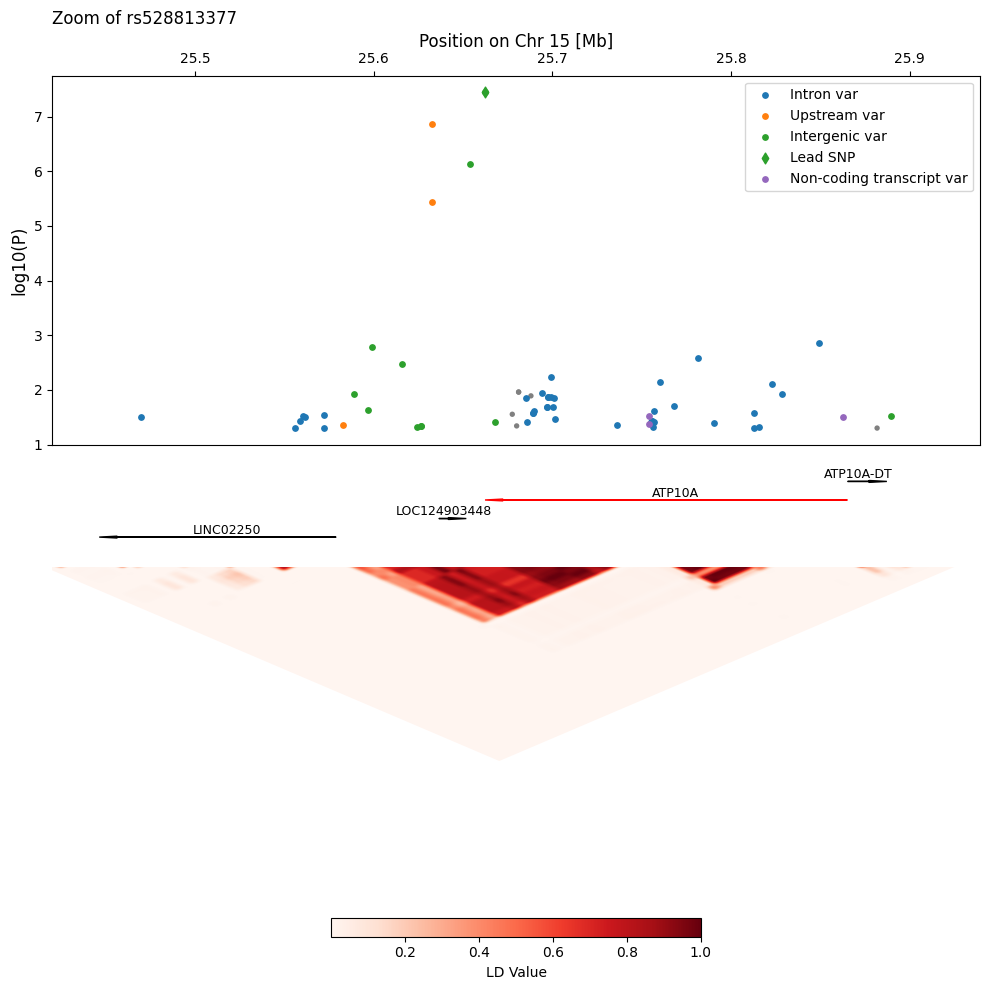

True

In [12]:
effect_dict1 = {
    'intron_variant': 'Intron var',
    'intergenic_variant': 'Intergenic var',
    'upstream_gene_variant': 'Upstream var',
    'non_coding_transcript_exon_variant': 'Non-coding transcript var',
}

draw_zoomed_heatmap(
    data_df       =df_gwas,
    lead_snp      =lead_snp1, 
    snp_col       =snp_col, 
    p_col         =p_col, 
    pos_col       =pos_col, 
    chr_col       =chr_col, 
    output_folder =path_params[0], 
    pval_threshold=5e-2, 
    radius        =250000, 
    build         ='38', 
    gtf_path      =None, 
    batch_size    =100, 
    bfile_folder  =path_params[3], 
    bfile_name    =path_params[4], 
    effect_dict   =effect_dict1,
    extension='jpeg'
)

In [13]:
lead_snp2 = 'rs72843781'

2024/12/17 17:28:51 Start to annotate variants with nearest gene name(s)...
2024/12/17 17:28:51  -Assigning Gene name using NCBI refseq latest GRCh38 for protein coding genes
2024/12/17 17:28:51  -Using user-provided gtf:/home/luis/CGE/ideal-genom/GCF_000001405.40_GRCh38.p14_genomic.gtf
2024/12/17 17:28:52 Finished annotating variants with nearest gene name(s) successfully!


               Functional_Consequence  count
0                      intron_variant     51
1                  intergenic_variant      7
2  non_coding_transcript_exon_variant      5
3                 3_prime_UTR_variant      1
4               upstream_gene_variant      1
5             downstream_gene_variant      1
6                  synonymous_variant      1
7           regulatory_region_variant      1


PLINK v1.90b7.4 64-bit (18 Aug 2024)           www.cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/luis/data/gwasResult/matrix-ld.log.
Opt

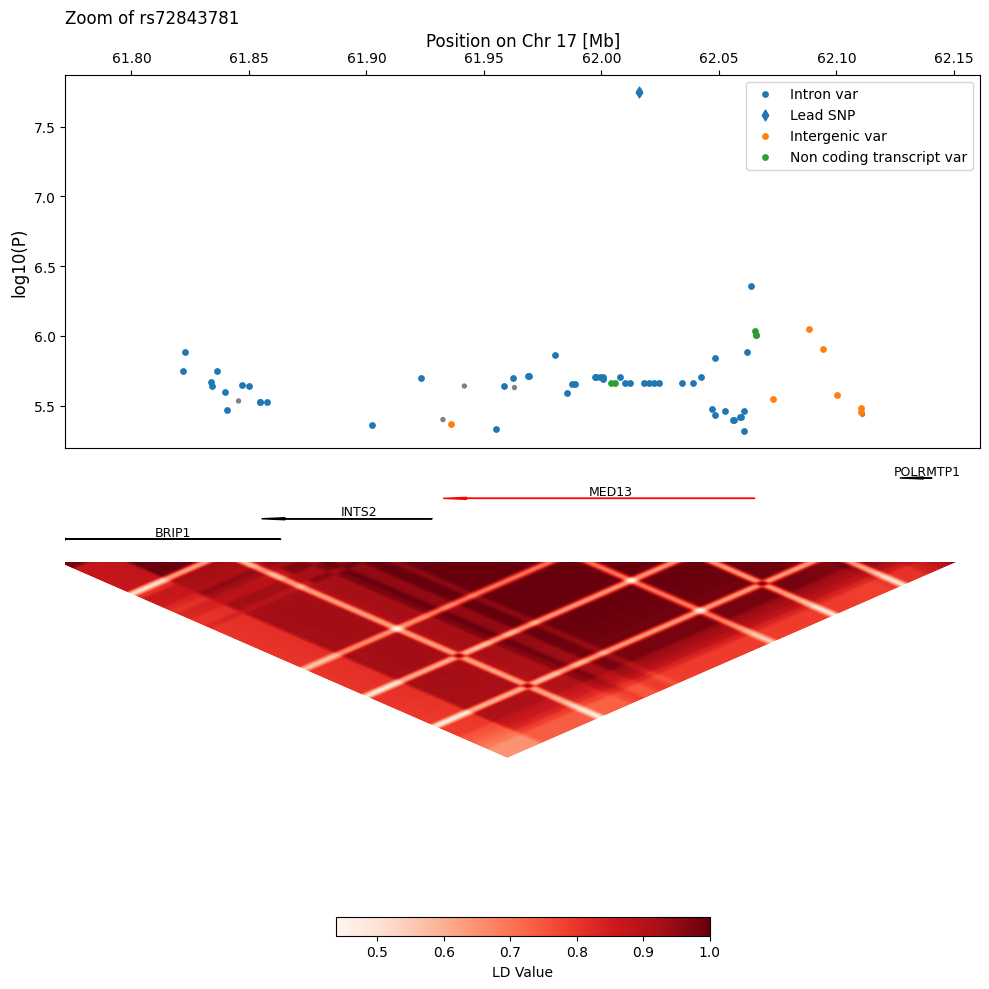

True

In [14]:
effect_dict2 ={
    'intron_variant': 'Intron var',
    'intergenic_variant': 'Intergenic var',
    'non_coding_transcript_exon_variant': 'Non coding transcript var'   
}

draw_zoomed_heatmap(
    data_df       =df_gwas,
    lead_snp      =lead_snp2, 
    snp_col       =snp_col, 
    p_col         =p_col, 
    pos_col       =pos_col, 
    chr_col       =chr_col, 
    output_folder =path_params[0], 
    pval_threshold=5e-6, 
    radius        =radius, 
    build         ='38', 
    gtf_path      =None, 
    batch_size    =100, 
    bfile_folder  =path_params[3], 
    bfile_name    =path_params[4], 
    effect_dict   =effect_dict2,
    extension='jpeg'
)

In [15]:
lead_snp3 = 'rs2092563'

2024/12/17 16:16:15 Start to annotate variants with nearest gene name(s)...
2024/12/17 16:16:15  -Assigning Gene name using NCBI refseq latest GRCh38 for protein coding genes
2024/12/17 16:16:15  -Using user-provided gtf:/home/luis/CGE/ideal-genom/GCF_000001405.40_GRCh38.p14_genomic.gtf
2024/12/17 16:16:17 Finished annotating variants with nearest gene name(s) successfully!


               Functional_Consequence  count
0                      intron_variant     58
1               upstream_gene_variant     23
2                  intergenic_variant     17
3             downstream_gene_variant      9
4  non_coding_transcript_exon_variant      8
5                  synonymous_variant      2
6                    missense_variant      1
7                 3_prime_UTR_variant      1
8                 5_prime_UTR_variant      1


PLINK v1.90b7.4 64-bit (18 Aug 2024)           www.cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 

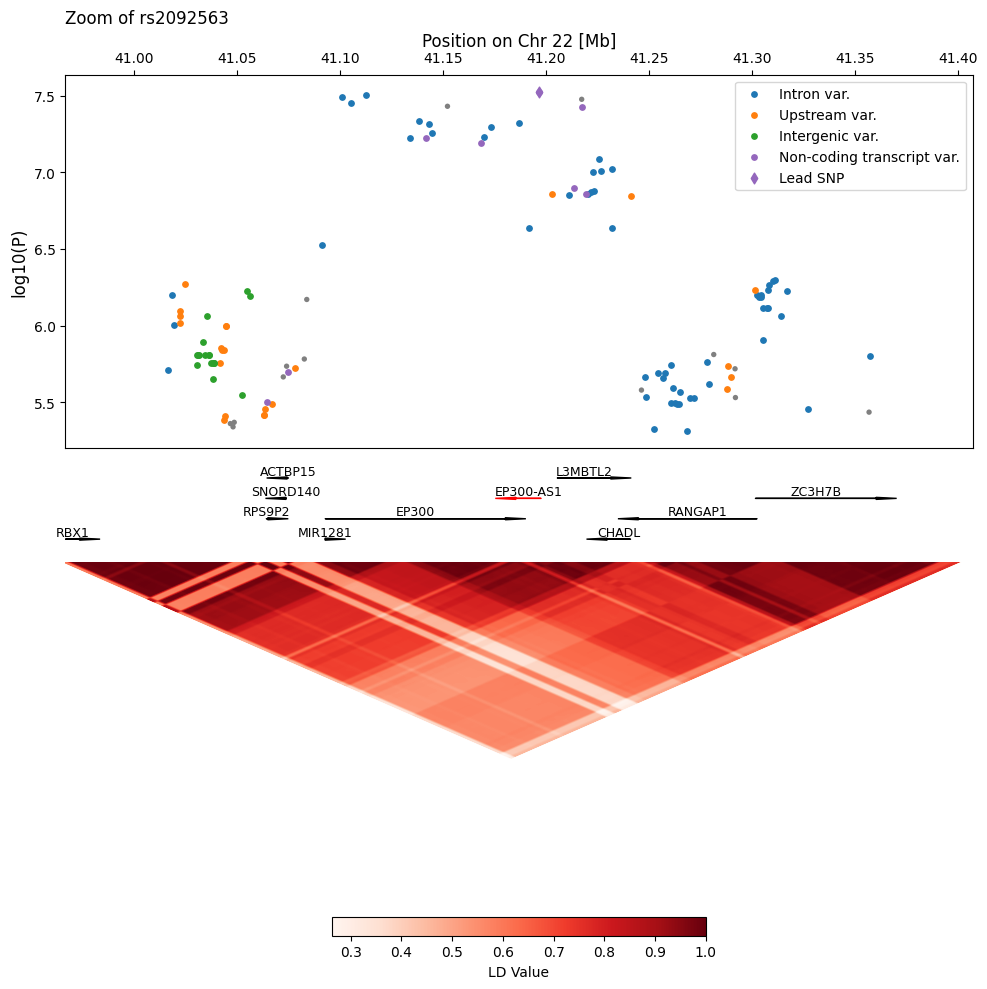

True

In [ ]:
effect_dict3 ={
    'intron_variant': 'Intron var',
    'upstream_gene_variant': 'Upstream var',
    'intergenic_variant': 'Intergenic var',
    'non_coding_transcript_exon_variant': 'Non coding transcript var'
}

draw_zoomed_heatmap(
    data_df       =df_gwas,
    lead_snp      =lead_snp3, 
    snp_col       =snp_col, 
    p_col         =p_col, 
    pos_col       =pos_col, 
    chr_col       =chr_col, 
    output_folder =path_params[0], 
    pval_threshold=5e-6, 
    radius        =radius, 
    build         ='38', 
    gtf_path      =None, 
    batch_size    =100, 
    bfile_folder  =path_params[3], 
    bfile_name    =path_params[4], 
    effect_dict   =effect_dict3,
    extension='jpeg'
)

In [12]:
lead_snp4 = 'rs2517680'

2024/12/17 17:46:34 Start to annotate variants with nearest gene name(s)...
2024/12/17 17:46:34  -Assigning Gene name using NCBI refseq latest GRCh38 for protein coding genes
2024/12/17 17:46:34  -Using user-provided gtf:/home/luis/CGE/ideal-genom/GCF_000001405.40_GRCh38.p14_genomic.gtf
2024/12/17 17:46:35 Finished annotating variants with nearest gene name(s) successfully!


                 Functional_Consequence  count
0                        intron_variant    143
1                    intergenic_variant     53
2    non_coding_transcript_exon_variant     41
3                 upstream_gene_variant     16
4               downstream_gene_variant     15
5                                   NaN      4
6                   3_prime_UTR_variant      4
7   splice_polypyrimidine_tract_variant      3
8                 splice_region_variant      1
9                   5_prime_UTR_variant      1
10                     missense_variant      1


PLINK v1.90b7.4 64-bit (18 Aug 2024)           www.cog-

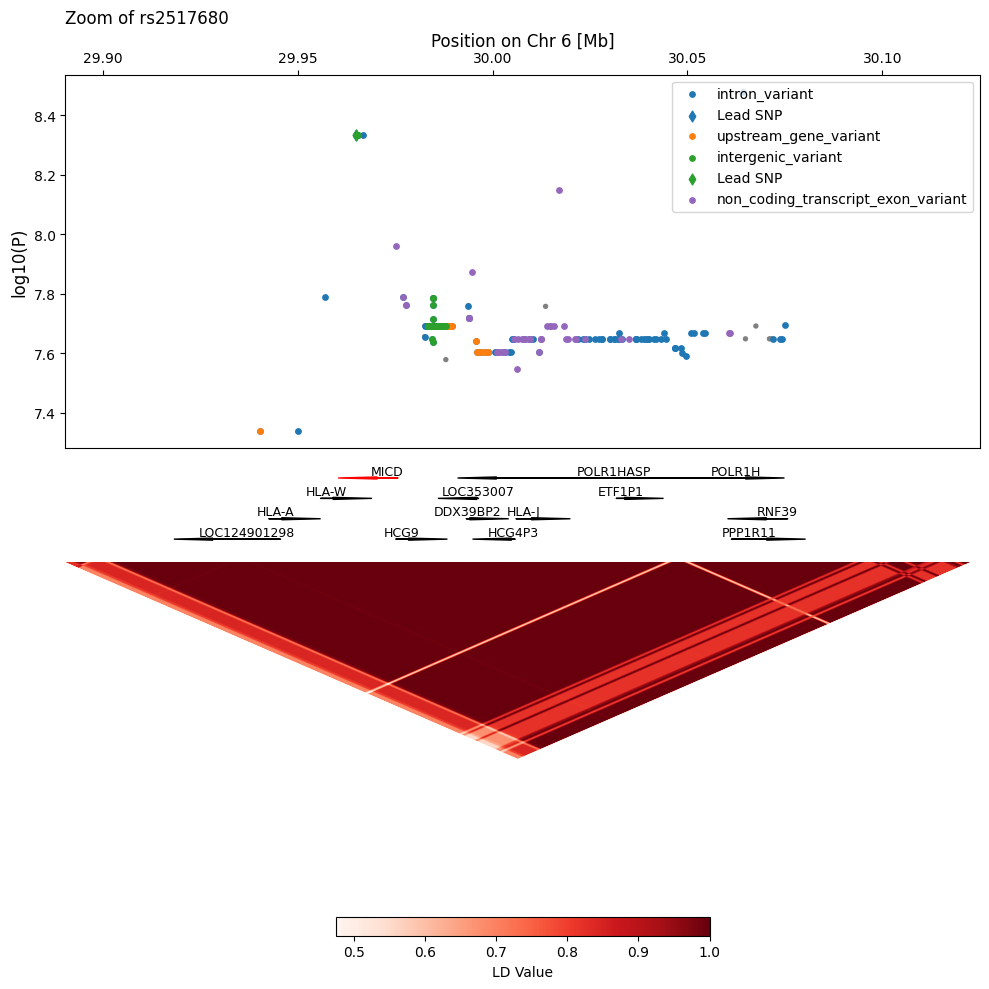

True

In [ ]:
draw_zoomed_heatmap(
    data_df       =df_gwas,
    lead_snp      =lead_snp4, 
    snp_col       =snp_col, 
    p_col         =p_col, 
    pos_col       =pos_col, 
    chr_col       =chr_col, 
    output_folder =path_params[0], 
    pval_threshold=5e-8, 
    radius        =radius,
    build         ='38', 
    gtf_path      =None, 
    bfile_folder  =path_params[3], 
    bfile_name    =path_params[4], 
    effect_dict   ={},
    extension='jpeg',
    request_persec=5,
    batch_size=5
)

In [29]:
from ideal_genom.zoom_heatmap import filter_sumstats

filtered_df = filter_sumstats(
        data_df       =df_gwas, 
        lead_snp      =lead_snp4, 
        snp_col       =snp_col, 
        p_col         =p_col, 
        pos_col       =pos_col, 
        chr_col       =chr_col, 
        pval_threshold=5e-8, 
        radius        =radius
    )

filtered_df

,#CHROM,POS,ID,P,log10p
0,6,29940334,rs9260052,4.593800e-08,7.337828
1,6,29950024,rs9260368,4.593800e-08,7.337828
2,6,29957045,rs428905,1.627840e-08,7.788388
3,6,29964911,rs2517680,4.656170e-09,8.331971
4,6,29965083,rs2571403,4.656170e-09,8.331971
...,...,...,...,...,...
177,6,30071587,rs11753382,2.244070e-08,7.648964
178,6,30071990,rs11753939,2.244070e-08,7.648964
179,6,30073732,rs11965379,2.244070e-08,7.648964
180,6,30074280,rs11965540,2.244070e-08,7.648964


In [30]:
from ideal_genom.zoom_heatmap import snp_annotations
annotated = snp_annotations(
        data_df=filtered_df, 
        snp_col=snp_col, 
        chr_col=chr_col, 
        pos_col=pos_col,
        build='38',
        batch_size=2,
        request_persec=3
    )

2024/12/17 16:51:22 Start to annotate variants with nearest gene name(s)...
2024/12/17 16:51:22  -Assigning Gene name using NCBI refseq latest GRCh38 for protein coding genes
2024/12/17 16:51:22  -Using user-provided gtf:/home/luis/CGE/ideal-genom/GCF_000001405.40_GRCh38.p14_genomic.gtf
2024/12/17 16:51:23 Finished annotating variants with nearest gene name(s) successfully!


In [31]:
annotated

,#CHROM,POS,ID,P,log10p,GENENAME,Functional_Consequence
0,6,29940334,rs9260052,4.593800e-08,7.337828,LOC124901298,intron_variant
1,6,29940334,rs9260052,4.593800e-08,7.337828,LOC124901298,intron_variant
2,6,29940334,rs9260052,4.593800e-08,7.337828,LOC124901298,intron_variant
3,6,29940334,rs9260052,4.593800e-08,7.337828,LOC124901298,intron_variant
4,6,29940334,rs9260052,4.593800e-08,7.337828,LOC124901298,upstream_gene_variant
...,...,...,...,...,...,...,...
1353,6,30075084,rs2285805,2.019000e-08,7.694864,RNF39,intron_variant
1354,6,30075084,rs2285805,2.019000e-08,7.694864,RNF39,intron_variant
1355,6,30075084,rs2285805,2.019000e-08,7.694864,RNF39,intron_variant
1356,6,30075084,rs2285805,2.019000e-08,7.694864,RNF39,intron_variant


In [32]:
annotated[annotated['ID'] == 'rs9260052']

,#CHROM,POS,ID,P,log10p,GENENAME,Functional_Consequence
0,6,29940334,rs9260052,4.593800e-08,7.337828,LOC124901298,intron_variant
1,6,29940334,rs9260052,4.593800e-08,7.337828,LOC124901298,intron_variant
2,6,29940334,rs9260052,4.593800e-08,7.337828,LOC124901298,intron_variant
3,6,29940334,rs9260052,4.593800e-08,7.337828,LOC124901298,intron_variant
4,6,29940334,rs9260052,4.593800e-08,7.337828,LOC124901298,upstream_gene_variant
5,6,29940334,rs9260052,4.593800e-08,7.337828,LOC124901298,upstream_gene_variant
6,6,29940334,rs9260052,4.593800e-08,7.337828,LOC124901298,upstream_gene_variant


In [ ]:
from ideal_genom.api_client import VEPEnsemblRestClient

vep_client = VEPEnsemblRestClient()

response = vep_client.post_vep_request(snps[2:5])
response

[{'input': 'rs428905',
  'seq_region_name': '6',
  'transcript_consequences': [{'gene_id': 'ENSG00000235290',
    'transcript_id': 'ENST00000439514',
    'biotype': 'transcribed_unprocessed_pseudogene',
    'gene_symbol': 'HLA-W',
    'gene_symbol_source': 'HGNC',
    'variant_allele': 'A',
    'strand': 1,
    'consequence_terms': ['intron_variant', 'non_coding_transcript_variant'],
    'impact': 'MODIFIER',
    'hgnc_id': 'HGNC:23425'},
   {'gene_id': 'ENSG00000293508',
    'biotype': 'lncRNA',
    'transcript_id': 'ENST00000849678',
    'gene_symbol': 'POLR1HASP',
    'consequence_terms': ['intron_variant', 'non_coding_transcript_variant'],
    'impact': 'MODIFIER',
    'gene_symbol_source': 'HGNC',
    'variant_allele': 'A',
    'strand': -1,
    'hgnc_id': 'HGNC:13924'},
   {'gene_symbol_source': 'HGNC',
    'variant_allele': 'A',
    'strand': -1,
    'impact': 'MODIFIER',
    'consequence_terms': ['intron_variant', 'non_coding_transcript_variant'],
    'hgnc_id': 'HGNC:13924',
 

In [ ]:
snps[0:9]

['rs9260052',
 'rs9260368',
 'rs428905',
 'rs2517680',
 'rs2571403',
 'rs2571404',
 'rs2517679',
 'rs2517677',
 'rs2523943']